In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv('dados.csv')
df.head()


,pessoa_id,emprestimo_id,historico_id,pessoa_id.1,pessoa_idade,pessoa_salario,pessoa_situacao_propriedade,pessoa_tempo_trabalho,emprestimo_id.1,emprestimo_intencao,emprestimo_pontuacao,emprestimo_valor,emprestimo_juros,emprestimo_inadimplencia,emprestimo_renda_percentual,historico_id.1,historico_inadimplencia,historico_temp_soli_credito
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,F9a6bBd9-Xe2o,27.0,68000.0,Rent,4.0,8HuvzhAq-k7Xi,Homeimprovement,A,8700.0,7.88,0.0,0.13,L42AQtMx-SEGR,N,5.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,RSQpYv0W-D6Oo,24.0,12600.0,Rent,2.0,PDpdl2hQ-Sszr,Venture,C,2500.0,13.11,1.0,0.20,oZ2iPvfD-HdIo,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,bRYeof0L-cqHI,30.0,100000.0,Rent,13.0,0T2YFLWb-IZze,Debtconsolidation,A,12000.0,7.88,0.0,0.12,0Y1a64ag-4RLW,N,9.0
3,d0YRlkdZ-nuLT,xzTEiD3e-BbFZ,Z5LA433k-5vqf,d0YRlkdZ-nuLT,28.0,83000.0,Mortgage,6.0,xzTEiD3e-BbFZ,Debtconsolidation,B,5000.0,NaN,0.0,0.06,Z5LA433k-5vqf,N,9.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,njGBnugm-85Dv,30.0,110400.0,Rent,1.0,QKDlpIm7-sqMC,Venture,D,14000.0,16.89,1.0,0.13,ObEkaKZr-9MDa,N,6.0


In [3]:
dicionario = {'pessoa_idade': 'idade',
                'pessoa_salario' : 'renda',
                'pessoa_situacao_propriedade': 'situacao_moradia',
                'pessoa_tempo_trabalho' : 'tempo_trabalhado',
                'emprestimo_intencao' : 'motivo_emprestimo',
                'emprestimo_pontuacao' : 'score',
                'emprestimo_valor' : 'valor_emprestimo',
                'emprestimo_juros' : 'taxa_juros',
                'emprestimo_inadimplencia' : 'inadimplente',
                'emprestimo_renda_percentual' : 'razao_renda_emprestimo',
                'historico_inadimplencia' : 'devedor',
                'historico_temp_soli_credito' : 'tempo_historico_credito'}

df.rename(dicionario, axis = 1, inplace = True)

In [4]:
df

,pessoa_id,emprestimo_id,historico_id,pessoa_id.1,idade,renda,situacao_moradia,tempo_trabalhado,emprestimo_id.1,motivo_emprestimo,score,valor_emprestimo,taxa_juros,inadimplente,razao_renda_emprestimo,historico_id.1,devedor,tempo_historico_credito
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,F9a6bBd9-Xe2o,27.0,68000.0,Rent,4.0,8HuvzhAq-k7Xi,Homeimprovement,A,8700.0,7.88,0.0,0.13,L42AQtMx-SEGR,N,5.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,RSQpYv0W-D6Oo,24.0,12600.0,Rent,2.0,PDpdl2hQ-Sszr,Venture,C,2500.0,13.11,1.0,0.20,oZ2iPvfD-HdIo,Y,2.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,bRYeof0L-cqHI,30.0,100000.0,Rent,13.0,0T2YFLWb-IZze,Debtconsolidation,A,12000.0,7.88,0.0,0.12,0Y1a64ag-4RLW,N,9.0
3,d0YRlkdZ-nuLT,xzTEiD3e-BbFZ,Z5LA433k-5vqf,d0YRlkdZ-nuLT,28.0,83000.0,Mortgage,6.0,xzTEiD3e-BbFZ,Debtconsolidation,B,5000.0,NaN,0.0,0.06,Z5LA433k-5vqf,N,9.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,njGBnugm-85Dv,30.0,110400.0,Rent,1.0,QKDlpIm7-sqMC,Venture,D,14000.0,16.89,1.0,0.13,ObEkaKZr-9MDa,N,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34496,KBhzFRke-pbDb,EIPG89tL-c5Aw,fCOA3t5X-RfBU,KBhzFRke-pbDb,23.0,80500.0,Rent,5.0,EIPG89tL-c5Aw,Venture,B,7200.0,9.25,0.0,0.09,fCOA3t5X-RfBU,N,3.0
34497,ptJwegim-zGeB,Lrx9nwEH-S6fg,t6k0WCbZ-qNwS,ptJwegim-zGeB,39.0,56000.0,Mortgage,14.0,Lrx9nwEH-S6fg,Personal,C,10000.0,12.73,0.0,0.18,t6k0WCbZ-qNwS,Y,12.0
34498,74Ht8wtX-viDe,DUuecHjh-hpvY,5vo8dTDd-gdMS,74Ht8wtX-viDe,28.0,29000.0,Rent,1.0,DUuecHjh-hpvY,Medical,C,8000.0,13.11,1.0,0.28,5vo8dTDd-gdMS,Y,9.0
34499,lyUgjRNf-Hjp9,AJBQgakp-AMbu,6Z79o9wP-uPWl,lyUgjRNf-Hjp9,27.0,44000.0,Mortgage,2.0,AJBQgakp-AMbu,Medical,NaN,7500.0,10.59,0.0,0.14,6Z79o9wP-uPWl,N,3.0


In [5]:
df = df.drop(['pessoa_id.1', 'emprestimo_id.1', 'historico_id.1'], axis=1)

In [6]:
df['devedor_encoded'] = df['devedor'].map({'Y': 1, 'N': 0})
df = df.drop(['devedor'], axis=1).rename(columns={'devedor_encoded': 'devedor'})

In [7]:
df.shape

(34501, 15)

## Remoção de nulos

In [8]:
na_counts = df.isna().sum()
print(na_counts)

pessoa_id                    16
emprestimo_id                 0
historico_id                  0
idade                       324
renda                       339
situacao_moradia            331
tempo_trabalhado           1254
motivo_emprestimo           315
score                       313
valor_emprestimo            331
taxa_juros                 3630
inadimplente                343
razao_renda_emprestimo      319
tempo_historico_credito       4
devedor                     370
dtype: int64


In [9]:
df = df.dropna()
df.shape

(28638, 15)

In [10]:
na_counts = df.isna().sum()
print(na_counts)

pessoa_id                  0
emprestimo_id              0
historico_id               0
idade                      0
renda                      0
situacao_moradia           0
tempo_trabalhado           0
motivo_emprestimo          0
score                      0
valor_emprestimo           0
taxa_juros                 0
inadimplente               0
razao_renda_emprestimo     0
tempo_historico_credito    0
devedor                    0
dtype: int64


## Removendo pessoas com idade maior que 100 e menor que 18 anos

In [11]:
df = df[df.idade < 100]
df = df[df.idade > 18]
df['idade']

0        27.0
1        24.0
2        30.0
4        30.0
6        24.0
         ... 
34495    49.0
34496    23.0
34497    39.0
34498    28.0
34500    23.0
Name: idade, Length: 28634, dtype: float64

## Tratamento de outliers

<AxesSubplot:xlabel='renda'>

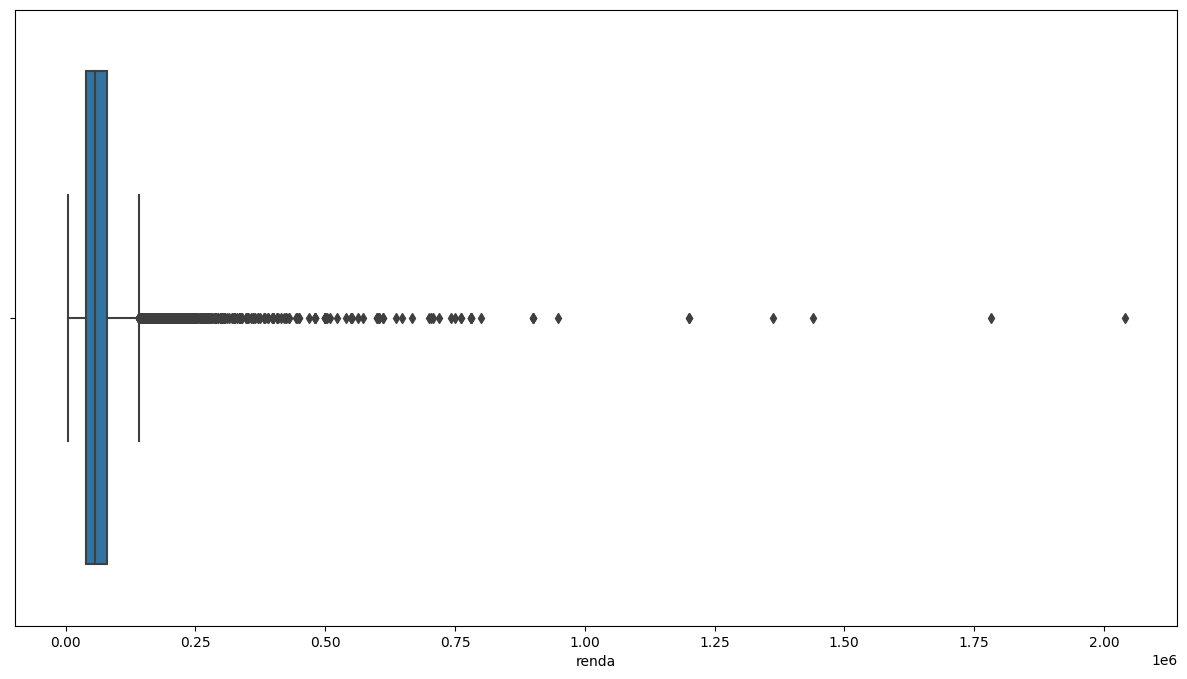

In [12]:
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='renda', data = df)

In [13]:
Q1 = df.renda.quantile(.25)
Q3 = df.renda.quantile(.75)
IIQ = Q3 - Q1
Out_inf = Q1 - 1.5 * IIQ
Out_sup = Q3 + 1.5 * IIQ
df = df[df.renda < Out_sup]
df

,pessoa_id,emprestimo_id,historico_id,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,inadimplente,razao_renda_emprestimo,tempo_historico_credito,devedor
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Rent,4.0,Homeimprovement,A,8700.0,7.88,0.0,0.13,5.0,0.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,24.0,12600.0,Rent,2.0,Venture,C,2500.0,13.11,1.0,0.20,2.0,1.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Rent,13.0,Debtconsolidation,A,12000.0,7.88,0.0,0.12,9.0,0.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,30.0,110400.0,Rent,1.0,Venture,D,14000.0,16.89,1.0,0.13,6.0,0.0
6,GN6ytQnE-DzMK,WbeWEny4-1t34,mMtKwh3x-cEpY,24.0,117996.0,Mortgage,6.0,Venture,E,18000.0,17.04,0.0,0.15,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,Wz2Qv33A-8FvI,TGecoRcA-s7G7,9KuS2sF2-bE4X,49.0,64600.0,Mortgage,4.0,Medical,D,10000.0,16.49,1.0,0.13,12.0,0.0
34496,KBhzFRke-pbDb,EIPG89tL-c5Aw,fCOA3t5X-RfBU,23.0,80500.0,Rent,5.0,Venture,B,7200.0,9.25,0.0,0.09,3.0,0.0
34497,ptJwegim-zGeB,Lrx9nwEH-S6fg,t6k0WCbZ-qNwS,39.0,56000.0,Mortgage,14.0,Personal,C,10000.0,12.73,0.0,0.18,12.0,1.0
34498,74Ht8wtX-viDe,DUuecHjh-hpvY,5vo8dTDd-gdMS,28.0,29000.0,Rent,1.0,Medical,C,8000.0,13.11,1.0,0.28,9.0,1.0


<AxesSubplot:xlabel='tempo_trabalhado'>

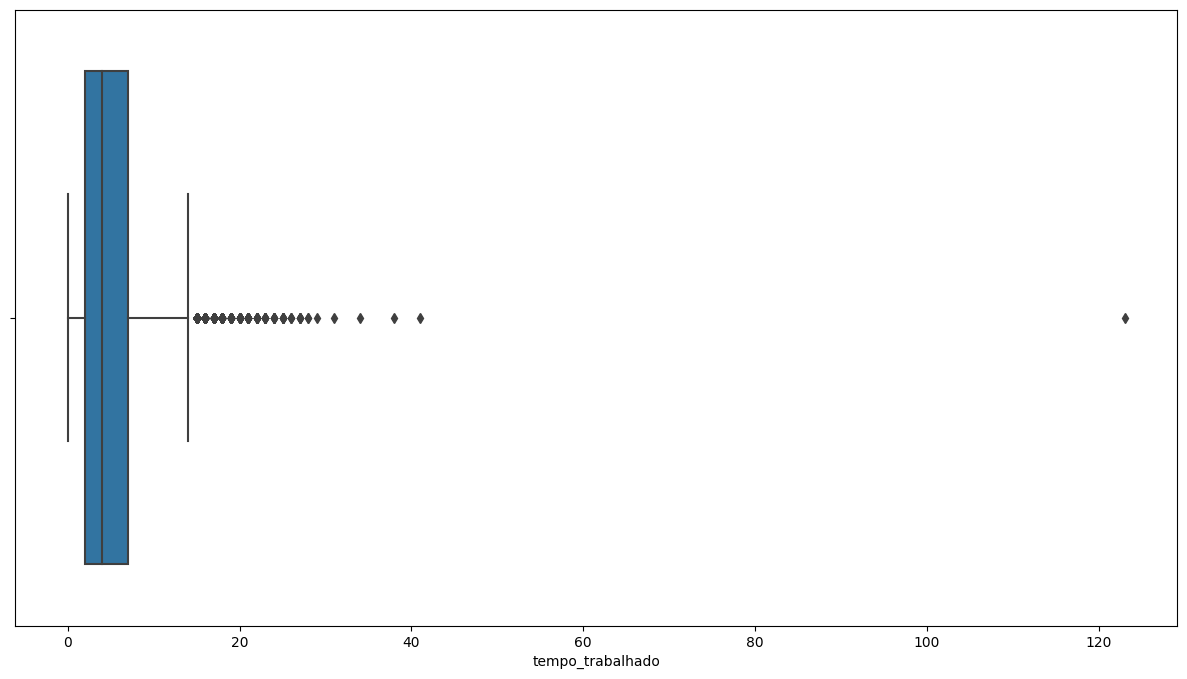

In [14]:
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x='tempo_trabalhado', data = df)

In [15]:
Q1 = df.tempo_trabalhado.quantile(.25)
Q3 = df.tempo_trabalhado.quantile(.75)
IIQ = Q3 - Q1
Out_inf = Q1 - 1.5 * IIQ
Out_sup = Q3 + 1.5 * IIQ
df = df[df.tempo_trabalhado < Out_sup]
df

,pessoa_id,emprestimo_id,historico_id,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,inadimplente,razao_renda_emprestimo,tempo_historico_credito,devedor
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Rent,4.0,Homeimprovement,A,8700.0,7.88,0.0,0.13,5.0,0.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,24.0,12600.0,Rent,2.0,Venture,C,2500.0,13.11,1.0,0.20,2.0,1.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Rent,13.0,Debtconsolidation,A,12000.0,7.88,0.0,0.12,9.0,0.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,30.0,110400.0,Rent,1.0,Venture,D,14000.0,16.89,1.0,0.13,6.0,0.0
6,GN6ytQnE-DzMK,WbeWEny4-1t34,mMtKwh3x-cEpY,24.0,117996.0,Mortgage,6.0,Venture,E,18000.0,17.04,0.0,0.15,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,Wz2Qv33A-8FvI,TGecoRcA-s7G7,9KuS2sF2-bE4X,49.0,64600.0,Mortgage,4.0,Medical,D,10000.0,16.49,1.0,0.13,12.0,0.0
34496,KBhzFRke-pbDb,EIPG89tL-c5Aw,fCOA3t5X-RfBU,23.0,80500.0,Rent,5.0,Venture,B,7200.0,9.25,0.0,0.09,3.0,0.0
34497,ptJwegim-zGeB,Lrx9nwEH-S6fg,t6k0WCbZ-qNwS,39.0,56000.0,Mortgage,14.0,Personal,C,10000.0,12.73,0.0,0.18,12.0,1.0
34498,74Ht8wtX-viDe,DUuecHjh-hpvY,5vo8dTDd-gdMS,28.0,29000.0,Rent,1.0,Medical,C,8000.0,13.11,1.0,0.28,9.0,1.0


In [16]:
df = df.drop(df[df['tempo_trabalhado'] > 120].index)
df[df['tempo_trabalhado'] > 120]
df['tempo_trabalhado']


0         4.0
1         2.0
2        13.0
4         1.0
6         6.0
         ... 
34495     4.0
34496     5.0
34497    14.0
34498     1.0
34500     0.0
Name: tempo_trabalhado, Length: 26618, dtype: float64

In [17]:
df.shape

(26618, 15)

In [18]:
df['score'] = df['score'].map({'G' : 0, 'F' : 1, 'E' : 2, 'D' : 3, 'C' : 4, 'B' : 5, 'A' : 6})
df.head()

,pessoa_id,emprestimo_id,historico_id,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,inadimplente,razao_renda_emprestimo,tempo_historico_credito,devedor
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Rent,4.0,Homeimprovement,6,8700.0,7.88,0.0,0.13,5.0,0.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,24.0,12600.0,Rent,2.0,Venture,4,2500.0,13.11,1.0,0.20,2.0,1.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Rent,13.0,Debtconsolidation,6,12000.0,7.88,0.0,0.12,9.0,0.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,30.0,110400.0,Rent,1.0,Venture,3,14000.0,16.89,1.0,0.13,6.0,0.0
6,GN6ytQnE-DzMK,WbeWEny4-1t34,mMtKwh3x-cEpY,24.0,117996.0,Mortgage,6.0,Venture,2,18000.0,17.04,0.0,0.15,3.0,1.0


## Tradução linhas

In [19]:
data = {'situacao_moradia': ['Rent', 'Mortgage', 'Own', 'Other'],
        'motivo_emprestimo': ['Homeimprovement', 'Venture', 'Debtconsolidation', 'Medical', 'Personal', 'Education']}

translation = {'Rent': 'Alugada', 'Mortgage': 'Hipoteca', 'Own': 'Própria',
               'Other': 'Outro', 'Homeimprovement': 'Melhoria da casa', 'Venture': 'Negócio',
               'Debtconsolidation': 'Pagamento de dividas', 'Medical': 'Despesas médicas', 'Personal' : 'Pessoal', 'Education': 'Educação'}

df['situacao_moradia'] = df['situacao_moradia'].map(translation)
df['motivo_emprestimo'] = df['motivo_emprestimo'].map(translation)

df

,pessoa_id,emprestimo_id,historico_id,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,inadimplente,razao_renda_emprestimo,tempo_historico_credito,devedor
0,F9a6bBd9-Xe2o,8HuvzhAq-k7Xi,L42AQtMx-SEGR,27.0,68000.0,Alugada,4.0,Melhoria da casa,6,8700.0,7.88,0.0,0.13,5.0,0.0
1,RSQpYv0W-D6Oo,PDpdl2hQ-Sszr,oZ2iPvfD-HdIo,24.0,12600.0,Alugada,2.0,Negócio,4,2500.0,13.11,1.0,0.20,2.0,1.0
2,bRYeof0L-cqHI,0T2YFLWb-IZze,0Y1a64ag-4RLW,30.0,100000.0,Alugada,13.0,Pagamento de dividas,6,12000.0,7.88,0.0,0.12,9.0,0.0
4,njGBnugm-85Dv,QKDlpIm7-sqMC,ObEkaKZr-9MDa,30.0,110400.0,Alugada,1.0,Negócio,3,14000.0,16.89,1.0,0.13,6.0,0.0
6,GN6ytQnE-DzMK,WbeWEny4-1t34,mMtKwh3x-cEpY,24.0,117996.0,Hipoteca,6.0,Negócio,2,18000.0,17.04,0.0,0.15,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,Wz2Qv33A-8FvI,TGecoRcA-s7G7,9KuS2sF2-bE4X,49.0,64600.0,Hipoteca,4.0,Despesas médicas,3,10000.0,16.49,1.0,0.13,12.0,0.0
34496,KBhzFRke-pbDb,EIPG89tL-c5Aw,fCOA3t5X-RfBU,23.0,80500.0,Alugada,5.0,Negócio,5,7200.0,9.25,0.0,0.09,3.0,0.0
34497,ptJwegim-zGeB,Lrx9nwEH-S6fg,t6k0WCbZ-qNwS,39.0,56000.0,Hipoteca,14.0,Pessoal,4,10000.0,12.73,0.0,0.18,12.0,1.0
34498,74Ht8wtX-viDe,DUuecHjh-hpvY,5vo8dTDd-gdMS,28.0,29000.0,Alugada,1.0,Despesas médicas,4,8000.0,13.11,1.0,0.28,9.0,1.0


## Exportando o dataset tratado

In [20]:
df.to_csv('dados_tratados.csv')

In [21]:
df = df.drop(['pessoa_id', 'emprestimo_id', 'historico_id'], axis=1)

## Análise de correlação

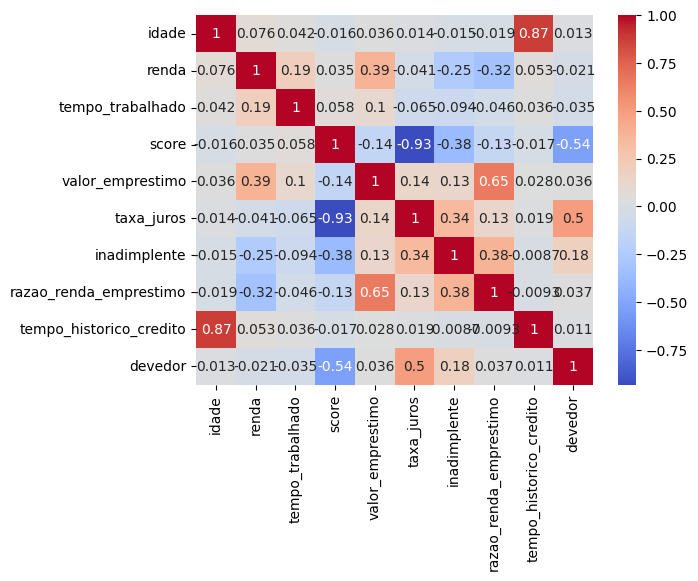

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


idade e tempo historico de crédito com correlação alta

In [23]:
df = df.drop('razao_renda_emprestimo', axis=1)

In [24]:
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [25]:
X

,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,tempo_historico_credito,devedor
0,27.0,68000.0,Alugada,4.0,Melhoria da casa,6,8700.0,7.88,5.0,0.0
1,24.0,12600.0,Alugada,2.0,Negócio,4,2500.0,13.11,2.0,1.0
2,30.0,100000.0,Alugada,13.0,Pagamento de dividas,6,12000.0,7.88,9.0,0.0
4,30.0,110400.0,Alugada,1.0,Negócio,3,14000.0,16.89,6.0,0.0
6,24.0,117996.0,Hipoteca,6.0,Negócio,2,18000.0,17.04,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
34495,49.0,64600.0,Hipoteca,4.0,Despesas médicas,3,10000.0,16.49,12.0,0.0
34496,23.0,80500.0,Alugada,5.0,Negócio,5,7200.0,9.25,3.0,0.0
34497,39.0,56000.0,Hipoteca,14.0,Pessoal,4,10000.0,12.73,12.0,1.0
34498,28.0,29000.0,Alugada,1.0,Despesas médicas,4,8000.0,13.11,9.0,1.0


## Encodificação de variáveis não-numéricas


In [26]:
X['score'].unique()

array([6, 4, 3, 2, 5, 1, 0], dtype=int64)

In [27]:
X.reset_index(drop=True, inplace=True)

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

colunas_categoricas = ['situacao_moradia','motivo_emprestimo']
encoder = make_column_transformer(
    (OneHotEncoder(), colunas_categoricas),
    remainder='passthrough')

encoded_X = encoder.fit_transform(X)
encoded_X = pd.DataFrame(encoded_X, columns=encoder.get_feature_names_out())
encoded_X.head()

,onehotencoder__situacao_moradia_Alugada,onehotencoder__situacao_moradia_Hipoteca,onehotencoder__situacao_moradia_Outro,onehotencoder__situacao_moradia_Própria,onehotencoder__motivo_emprestimo_Despesas médicas,onehotencoder__motivo_emprestimo_Educação,onehotencoder__motivo_emprestimo_Melhoria da casa,onehotencoder__motivo_emprestimo_Negócio,onehotencoder__motivo_emprestimo_Pagamento de dividas,onehotencoder__motivo_emprestimo_Pessoal,remainder__idade,remainder__renda,remainder__tempo_trabalhado,remainder__score,remainder__valor_emprestimo,remainder__taxa_juros,remainder__tempo_historico_credito,remainder__devedor
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,68000.0,4.0,6.0,8700.0,7.88,5.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,12600.0,2.0,4.0,2500.0,13.11,2.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,100000.0,13.0,6.0,12000.0,7.88,9.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,110400.0,1.0,3.0,14000.0,16.89,6.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,117996.0,6.0,2.0,18000.0,17.04,3.0,1.0


In [29]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

## Normalização com min-max scalling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(encoded_X)
scaled_X = pd.DataFrame(scaled_X, columns = encoded_X.columns)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [31]:
scaled_X

,onehotencoder__situacao_moradia_Alugada,onehotencoder__situacao_moradia_Hipoteca,onehotencoder__situacao_moradia_Outro,onehotencoder__situacao_moradia_Própria,onehotencoder__motivo_emprestimo_Despesas médicas,onehotencoder__motivo_emprestimo_Educação,onehotencoder__motivo_emprestimo_Melhoria da casa,onehotencoder__motivo_emprestimo_Negócio,onehotencoder__motivo_emprestimo_Pagamento de dividas,onehotencoder__motivo_emprestimo_Pessoal,remainder__idade,remainder__renda,remainder__tempo_trabalhado,remainder__score,remainder__valor_emprestimo,remainder__taxa_juros,remainder__tempo_historico_credito,remainder__devedor
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.109375,0.467881,0.285714,1.000000,0.237681,0.138202,0.107143,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.062500,0.062871,0.142857,0.666667,0.057971,0.432022,0.000000,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.156250,0.701821,0.928571,1.000000,0.333333,0.138202,0.250000,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.156250,0.777852,0.071429,0.500000,0.391304,0.644382,0.142857,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.062500,0.833383,0.428571,0.333333,0.507246,0.652809,0.035714,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26613,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.453125,0.443025,0.285714,0.500000,0.275362,0.621910,0.357143,0.0
26614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.046875,0.559264,0.357143,0.833333,0.194203,0.215169,0.035714,0.0
26615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.296875,0.380153,1.000000,0.666667,0.275362,0.410674,0.357143,1.0
26616,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.182766,0.071429,0.666667,0.217391,0.432022,0.250000,1.0


## Modelo

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=100)

## Balanceamento

In [34]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=100,sampling_strategy=0.5)
X_balanced, y_balanced = under.fit_resample(X_train, y_train)
X_balanced



,onehotencoder__situacao_moradia_Alugada,onehotencoder__situacao_moradia_Hipoteca,onehotencoder__situacao_moradia_Outro,onehotencoder__situacao_moradia_Própria,onehotencoder__motivo_emprestimo_Despesas médicas,onehotencoder__motivo_emprestimo_Educação,onehotencoder__motivo_emprestimo_Melhoria da casa,onehotencoder__motivo_emprestimo_Negócio,onehotencoder__motivo_emprestimo_Pagamento de dividas,onehotencoder__motivo_emprestimo_Pessoal,remainder__idade,remainder__renda,remainder__tempo_trabalhado,remainder__score,remainder__valor_emprestimo,remainder__taxa_juros,remainder__tempo_historico_credito,remainder__devedor
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.156250,0.412320,0.142857,0.833333,0.130435,0.408427,0.214286,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.156250,0.321668,0.214286,0.666667,0.275362,0.418539,0.214286,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.109375,0.343600,0.071429,1.000000,0.043478,0.130337,0.142857,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.343750,0.263183,0.000000,1.000000,0.130435,0.042135,0.357143,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.171875,0.336289,0.071429,0.833333,0.275362,0.408427,0.214286,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13153,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.093750,0.365532,0.714286,0.833333,0.089855,0.408427,0.071429,0.0
13154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.046875,0.084803,0.071429,1.000000,0.115942,0.032022,0.071429,0.0
13155,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.093750,0.584851,0.500000,0.500000,0.420290,0.594382,0.000000,1.0
13156,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.031250,0.168145,0.142857,0.833333,0.231884,0.381461,0.000000,0.0


In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)


Mean Squared Error: 0.1296522296451618
r_squared error: 0.2785126242637316


In [36]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate 
import numpy as np
SEED = 123
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, X_balanced, y_balanced, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Acurácia com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Acurácia com dummy stratified, 10 = [66.60, 66.73]


In [37]:
def imprime_resultados(results):
    media1 = results['test_accuracy'].mean()
    media2 = results['test_precision'].mean()
    media3 = results['test_recall'].mean()
    media4 = results['test_f1'].mean()
    desvio_padrao1 = results['test_accuracy'].std()
    desvio_padrao2 = results['test_precision'].std()
    desvio_padrao3 = results['test_recall'].std()
    desvio_padrao4 = results['test_f1'].std()
    print("Acurácia ficará entre = [%.2f, %.2f]" % ((media1 - 2 * desvio_padrao1) * 100, (media1 + 2 * desvio_padrao1) * 100))
    print("Precisão ficará entre = [%.2f, %.2f]" % ((media2 - 2 * desvio_padrao2) * 100, (media2 + 2 * desvio_padrao2) * 100))
    print("Sensibilidade ficará entre = [%.2f, %.2f]" % ((media3 - 2 * desvio_padrao3) * 100, (media3 + 2 * desvio_padrao3) * 100))
    print("F1 ficará entre = [%.2f, %.2f]" % ((media4 - 2 * desvio_padrao4) * 100, (media4 + 2 * desvio_padrao4) * 100))

In [38]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = True)

In [39]:
from sklearn.svm import LinearSVC
modelo =  LinearSVC(max_iter=1000, random_state=SEED)
results = cross_validate(modelo, X_balanced, y_balanced, cv = cv, return_train_score=False, scoring=('accuracy', 'precision', 'recall', 'f1'))
imprime_resultados(results)

Acurácia ficará entre = [78.45, 81.86]
Precisão ficará entre = [71.46, 76.68]
Sensibilidade ficará entre = [59.08, 65.65]
F1 ficará entre = [65.99, 69.39]


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('A acurácia foi de:', accuracy)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)

A acurácia foi de: 0.8858001502629602
Mean Squared Error: 0.11419984973703982
r_squared error: 0.36450186686528985


## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('A acurácia foi de:', accuracy)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)

A acurácia foi de: 0.7788129226145755
Mean Squared Error: 0.22118707738542448
r_squared error: -0.23085954207143877


## KNearestNeighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('A acurácia foi de:', accuracy)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)

A acurácia foi de: 0.8620586025544703
Mean Squared Error: 0.1379413974455297
r_squared error: 0.23238514971360003


Conclusão DecisitonTree mostrou as melhores métricas seguida muito de perto por KNN.

## Otimização

GridCV com DecisionTree

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2, 4, 6, 8, 10],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4, 6, 8]}

grid_search = GridSearchCV(dtc, params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
dtc.set_params(**best_params)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print("Melhores hyperparâmetros:", best_params)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('A acurácia foi de:', accuracy)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)



Melhores hyperparâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
A acurácia foi de: 0.9194590533433509
Mean Squared Error: 0.08054094665664914
r_squared error: 0.5518065797892044


GridCV com KNN

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3, 5, 7],
          'weights': ['uniform', 'distance'],
          'p': [1, 2]}

grid_search = GridSearchCV(knn, params, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
knn.set_params(**best_params)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("Melhores hyperparâmetros:", best_params)

accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('A acurácia foi de:', accuracy)
print('Mean Squared Error:', mse)
print('r_squared error:', r_squared)


Melhores hyperparâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
A acurácia foi de: 0.870473328324568
Mean Squared Error: 0.129526671675432
r_squared error: 0.2792113279445787


Após otimização KNN se mostrou melhor que DecistionTree

## Exportando o modelo KNN com pickle

In [45]:
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)



In [46]:
with open('knn_model.pkl', 'rb') as f:
    knn_loaded = pickle.load(f)

In [47]:
X

,idade,renda,situacao_moradia,tempo_trabalhado,motivo_emprestimo,score,valor_emprestimo,taxa_juros,tempo_historico_credito,devedor
0,27.0,68000.0,Alugada,4.0,Melhoria da casa,6,8700.0,7.88,5.0,0.0
1,24.0,12600.0,Alugada,2.0,Negócio,4,2500.0,13.11,2.0,1.0
2,30.0,100000.0,Alugada,13.0,Pagamento de dividas,6,12000.0,7.88,9.0,0.0
3,30.0,110400.0,Alugada,1.0,Negócio,3,14000.0,16.89,6.0,0.0
4,24.0,117996.0,Hipoteca,6.0,Negócio,2,18000.0,17.04,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
26613,49.0,64600.0,Hipoteca,4.0,Despesas médicas,3,10000.0,16.49,12.0,0.0
26614,23.0,80500.0,Alugada,5.0,Negócio,5,7200.0,9.25,3.0,0.0
26615,39.0,56000.0,Hipoteca,14.0,Pessoal,4,10000.0,12.73,12.0,1.0
26616,28.0,29000.0,Alugada,1.0,Despesas médicas,4,8000.0,13.11,9.0,1.0


In [48]:
X.dtypes

idade                      float64
renda                      float64
situacao_moradia            object
tempo_trabalhado           float64
motivo_emprestimo           object
score                        int64
valor_emprestimo           float64
taxa_juros                 float64
tempo_historico_credito    float64
devedor                    float64
dtype: object